### Analysis of User Data

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sb

In [168]:
openCloseData = pd.read_csv('openCloseData.csv')
print(openCloseData.shape)

(159996, 35)


In [169]:
openCloseData.columns

Index(['Unnamed: 0', 'PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags',
       'Reputation', 'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe',
       'Views', 'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount',
       'closed', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'],
      dtype='object')

In [170]:
openData = openCloseData[openCloseData['closed'] == 0]
closeData = openCloseData[openCloseData['closed'] == 1]
print((openData.shape, closeData.shape))

((80000, 35), (79996, 35))


### 1. Reputation

In [171]:
max_reputation_o = np.max(openData['Reputation'])
min_reputation_o = np.min(openData['Reputation'])
avg_reputation_o = np.mean(openData['Reputation'])
max_reputation_c = np.max(closeData['Reputation'])
min_reputation_c = np.min(closeData['Reputation'])
avg_reputation_c = np.mean(closeData['Reputation'])

In [172]:
print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_reputation_o) + '\t\t' + str(max_reputation_c))
print('Minimum\t\t' + str(min_reputation_o) + '\t\t' + str(min_reputation_c))
print('Average\t\t' + str(avg_reputation_o) + '\t' + str(avg_reputation_c))
print('Mode\t\t' + str(stat.mode(openData['Reputation'])) + '\t\t' + str(stat.mode(closeData['Reputation'])))
print('Median\t\t' + str(stat.median(openData['Reputation'])) + '\t\t' + str(stat.median(closeData['Reputation'])))

Value		Open		Close
Maximum		670141		678046
Minimum		1		1
Average		1680.9328875	2355.232299114956
Mode		1		1
Median		157.0		93.0


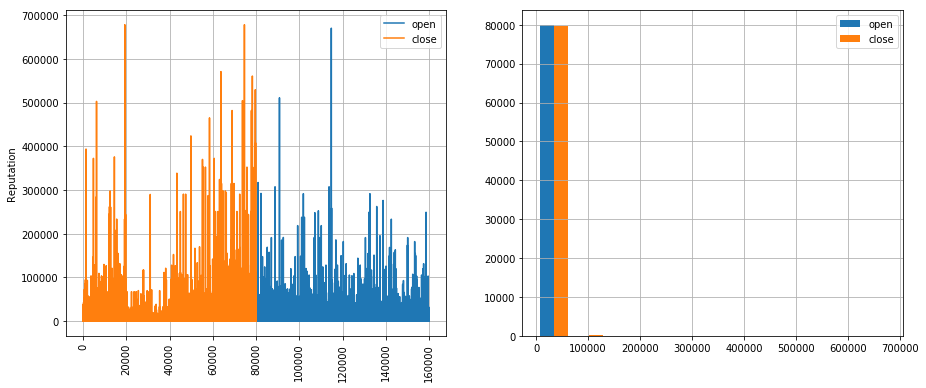

In [173]:
plt.figure(figsize=(15,6))

plt.title('General Trend in User\'s Reputation')
plt.subplot(1,2,1)
plt.plot(openData['Reputation'], label = 'open')
plt.plot(closeData['Reputation'], label = 'close')
plt.xticks(rotation='vertical')
plt.ylabel('Reputation')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.hist([openData['Reputation'],closeData['Reputation']], label = ['open', 'close'])
plt.legend()
plt.grid(True)

plt.show()

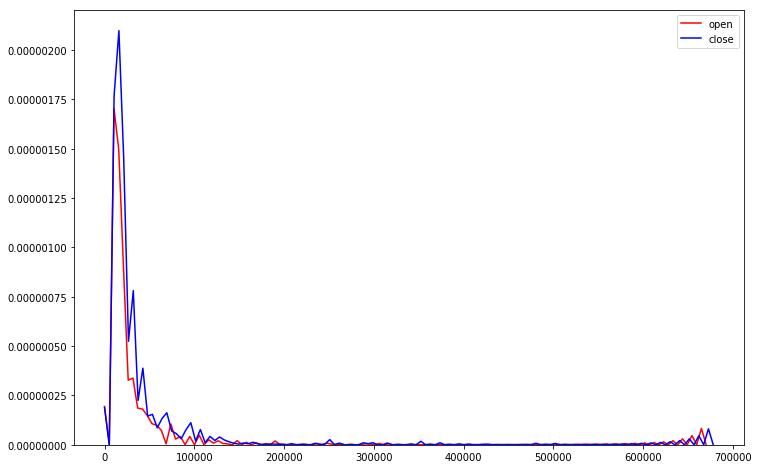

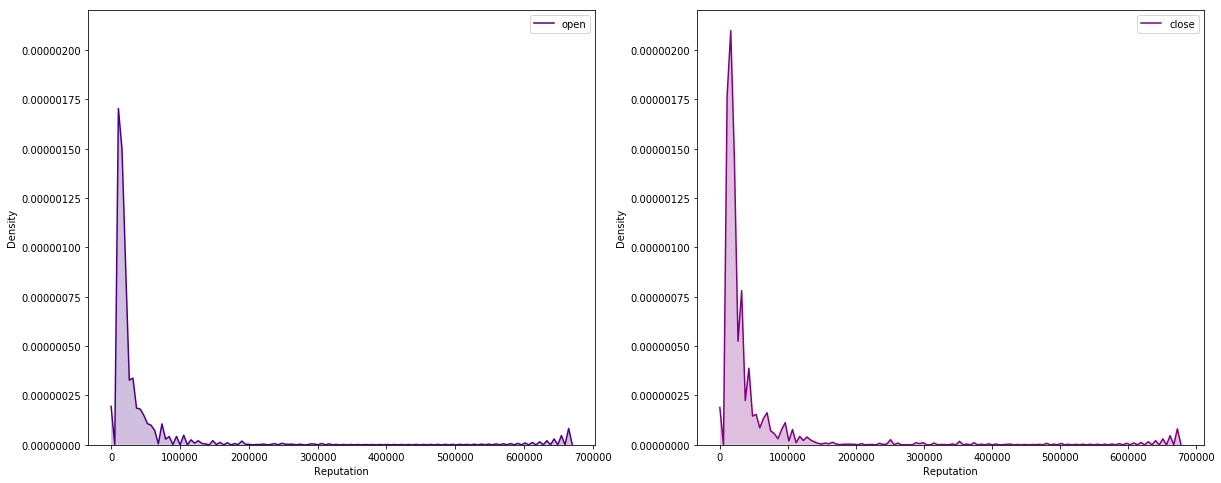

In [203]:
plt.figure(figsize=(12,8))
sb.kdeplot(openData['Reputation'], label = 'open', color = 'r')
sb.kdeplot(closeData['Reputation'], label = 'close', color = 'b')
plt.show()

plt.figure(figsize = (20,8))

ax = plt.subplot(1,2,1)
sb.kdeplot(openData['Reputation'], label = 'open', shade = True, color='indigo')
plt.ylabel('Density')
plt.xlabel('Reputation')

plt.subplot(1,2,2, sharey = ax)
sb.kdeplot(closeData['Reputation'], label = 'close', shade = True,color='purple')
plt.ylabel('Density')
plt.xlabel('Reputation')

plt.show()

					No. of Questions vs User's Reputation



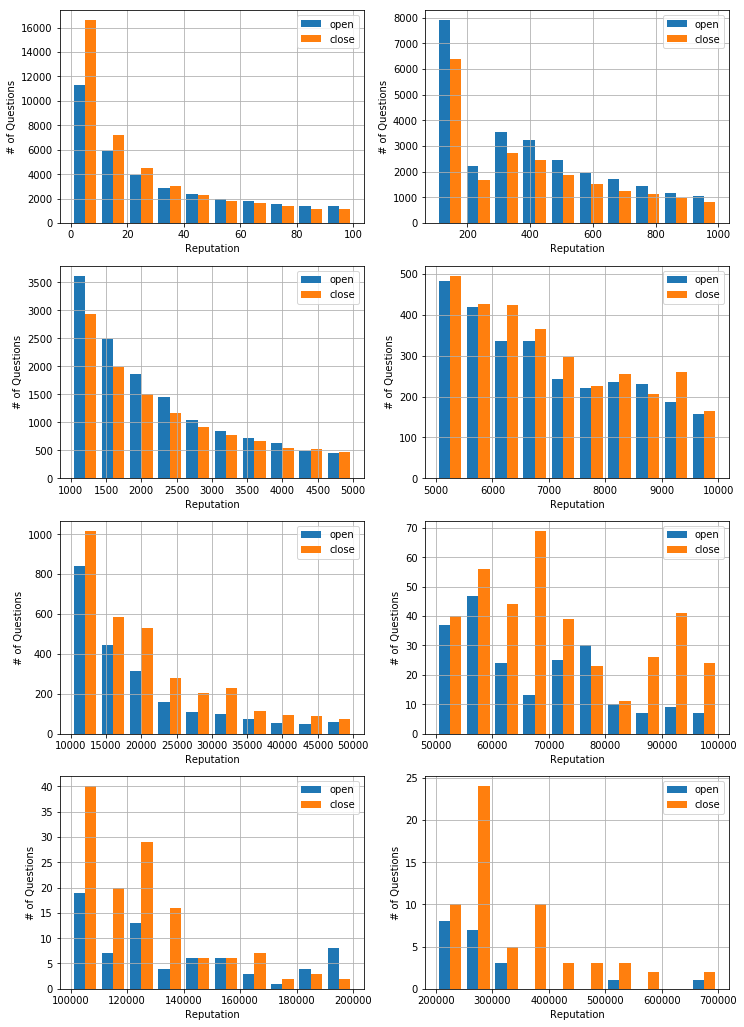

In [175]:
def hist_plot_range(min_value, max_value, col):
    """ To plot histogram using the 'col' field of Dataset for the values in the range 'min_value' - 'max_value' """
    plt.hist([openData[col],closeData[col]], range=(min_value, max_value), label = ['open', 'close'])
    plt.xlabel(col)
    plt.ylabel('# of Questions')
    plt.grid(True)
    plt.legend()
  
print('\t\t\t\t\tNo. of Questions vs User\'s Reputation\n')

plt.figure(figsize = (12,18))
range_list = [(0,100),(100,1000),(1000,5000),(5000,10000),(10000,50000),(50000,100000),(100000,200000),(200000,700000)]

for i in range(8):
    plt.subplot(4, 2, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'Reputation')
    
plt.show()

# No. of close Questions < open Questions only when User Reputation is in range (40, approx. 4250) or (180000, 200000).

### 2. Experience

In [176]:
max_exp_o = np.max(openData['experienceInTime'])
min_exp_o = np.min(openData['experienceInTime'])
avg_exp_o = np.mean(openData['experienceInTime'])
max_exp_c = np.max(closeData['experienceInTime'])
min_exp_c = np.min(closeData['experienceInTime'])
avg_exp_c = np.mean(closeData['experienceInTime'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_exp_o) + '\t\t' + str(max_exp_c))
print('Minimum\t\t' + str(min_exp_o) + '\t\t' + str(min_exp_c))
print('Average\t\t' + str(avg_exp_o) + '\t' + str(avg_exp_c))
print('Mode\t\t' + str(stat.mode(openData['experienceInTime'])) + '\t\t' + str(stat.mode(closeData['experienceInTime'])))
print('Median\t\t' + str(stat.median(openData['experienceInTime'])) + '\t\t' + str(stat.median(closeData['experienceInTime'])))

Value		Open		Close
Maximum		2842		3717
Minimum		-261		-660
Average		585.9979	434.1321191059553
Mode		0		0
Median		411.0		195.0


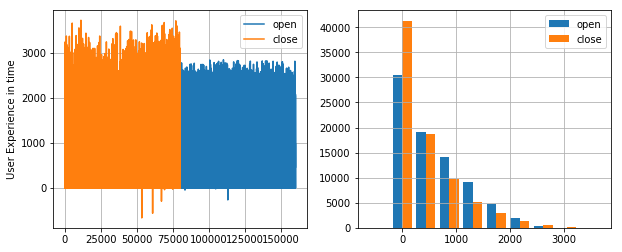

In [211]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(openData['experienceInTime'], label = 'open')
plt.plot(closeData['experienceInTime'], label = 'close')
plt.ylabel('User Experience in time')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.hist([openData['experienceInTime'],closeData['experienceInTime']], label = ['open', 'close'])
plt.legend()
plt.grid(True)

plt.show()

					No. of Questions vs User's Experience



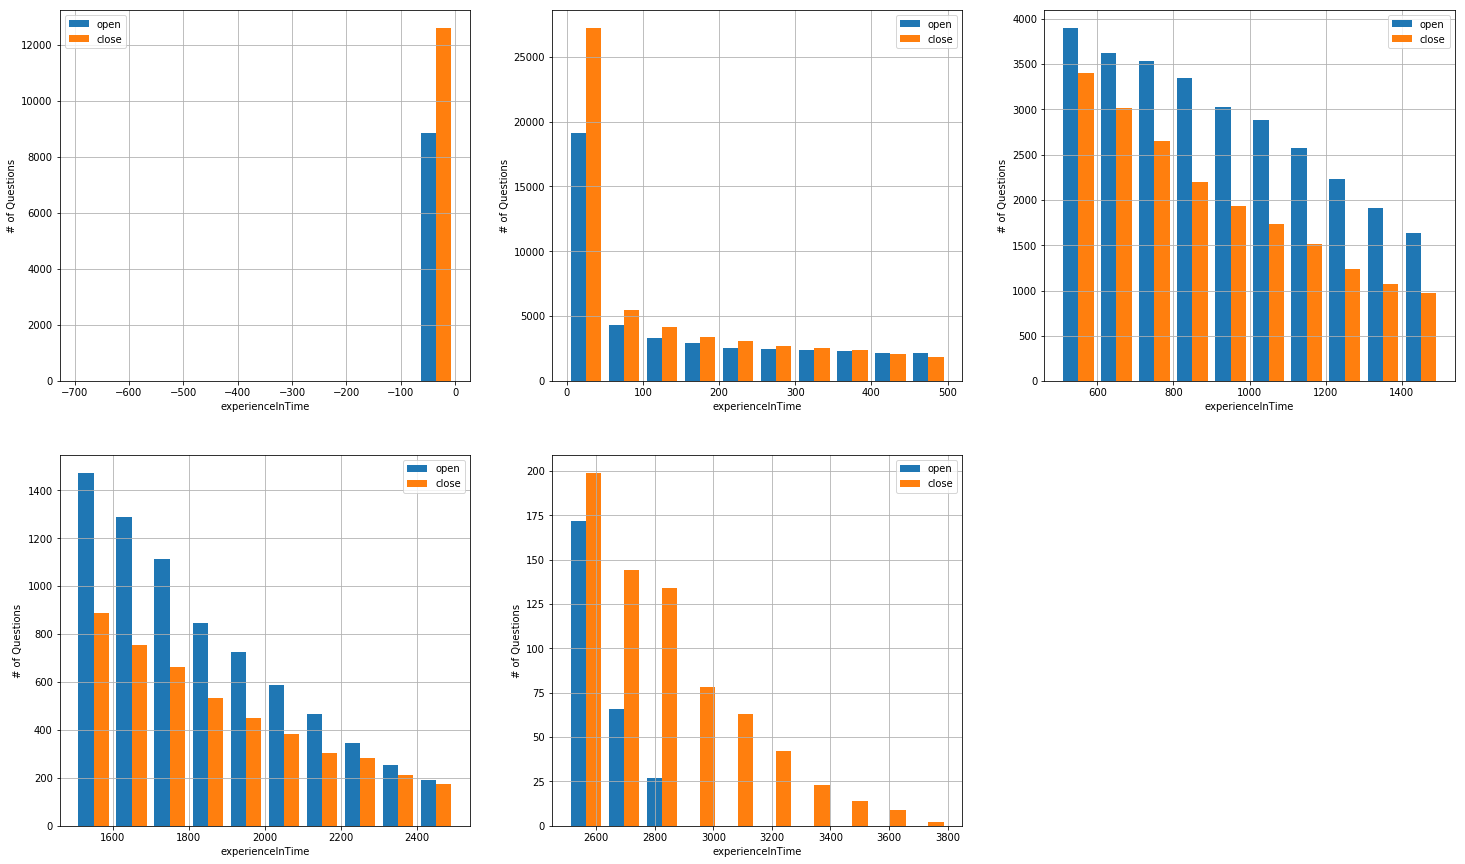

In [178]:
print('\t\t\t\t\tNo. of Questions vs User\'s Experience\n')

plt.figure(figsize = (25,15))
range_list = [(-700,0),(0,500),(500,1500),(1500,2500),(2500,3800)]

for i in range(5):
    plt.subplot(2, 3, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'experienceInTime')
    
plt.show()

# No. of Closed Questions > Open Questions when Experience is < 400 or >= 2500

### 3. Upvotes

In [179]:
max_upvote_o = np.max(openData['Upvotes'])
min_upvote_o = np.min(openData['Upvotes'])
avg_upvote_o = np.mean(openData['Upvotes'])
max_upvote_c = np.max(closeData['Upvotes'])
min_upvote_c = np.min(closeData['Upvotes'])
avg_upvote_c = np.mean(closeData['Upvotes'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_upvote_o) + '\t\t' + str(max_upvote_c))
print('Minimum\t\t' + str(min_upvote_o) + '\t\t' + str(min_upvote_c))
print('Average\t\t' + str(avg_upvote_o) + '\t' + str(avg_upvote_c))
print('Mode\t\t' + str(stat.mode(openData['Upvotes'])) + '\t\t' + str(stat.mode(closeData['Upvotes'])))
print('Median\t\t' + str(stat.median(openData['Upvotes'])) + '\t\t' + str(stat.median(closeData['Upvotes'])))

Value		Open		Close
Maximum		46408		29505
Minimum		0		0
Average		226.3046375	226.1293189659483
Mode		0		0
Median		20.0		12.0


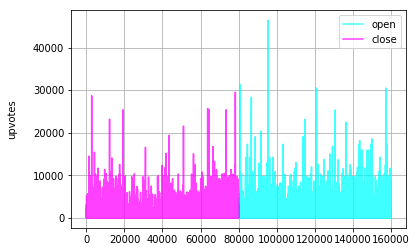

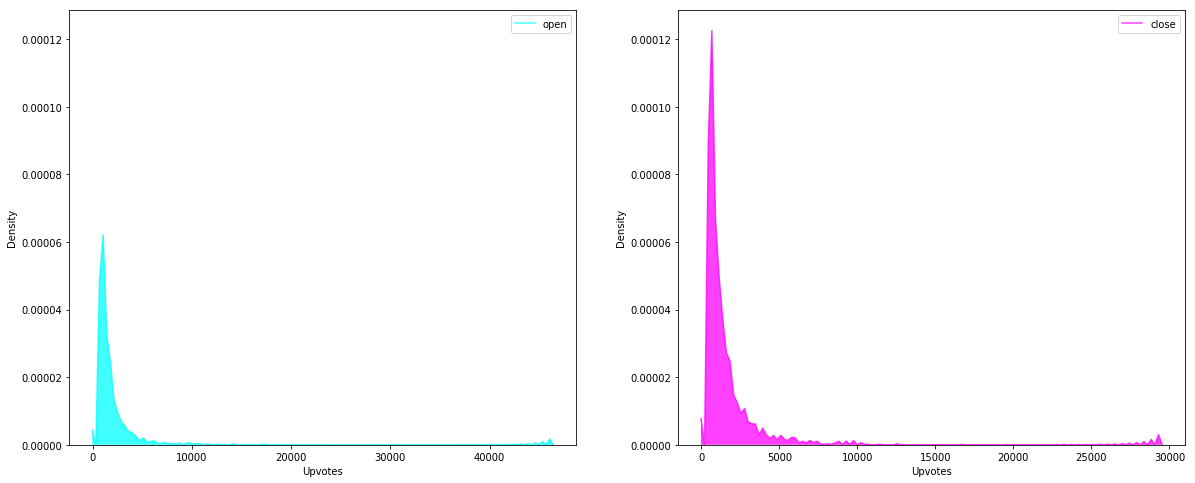

In [212]:
plt.figure()
plt.plot(openData['Upvotes'], label = 'open', color='cyan', alpha=0.75)
plt.plot(closeData['Upvotes'], label = 'close', color='magenta', alpha=0.75)
plt.ylabel('upvotes\n')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize = (20,8))

ax = plt.subplot(1,2,1)
sb.kdeplot(openData['Upvotes'], label = 'open', shade = True, color='cyan', alpha=0.75)
plt.ylabel('Density')
plt.xlabel('Upvotes')

plt.subplot(1,2,2, sharey = ax)
sb.kdeplot(closeData['Upvotes'], label = 'close', shade = True, color='magenta', alpha=0.75)
plt.ylabel('Density')
plt.xlabel('Upvotes')

plt.show()

						No. of Questions vs User's Upvotes



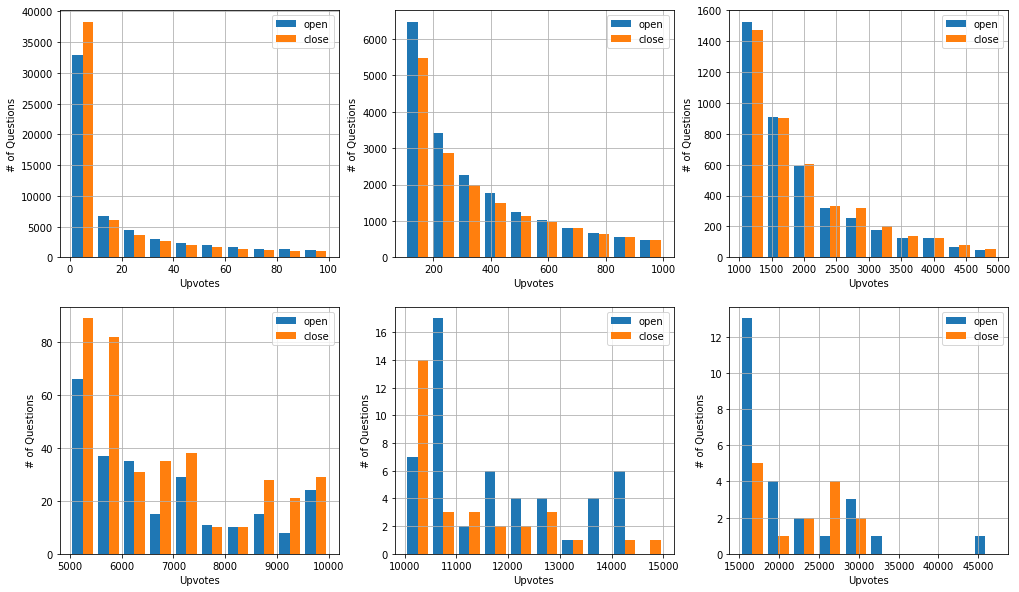

In [181]:
print('\t\t\t\t\t\tNo. of Questions vs User\'s Upvotes\n')

plt.figure(figsize = (17,10))
range_list = [(0,100),(100,1000),(1000,5000),(5000,10000),(10000, 15000),(15000, 47500)]

for i in range(6):
    plt.subplot(2, 3, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'Upvotes')
    
plt.show()

### 4. Downvotes

In [182]:
max_downvote_o = np.max(openData['Downvotes'])
min_downvote_o = np.min(openData['Downvotes'])
avg_downvote_o = np.mean(openData['Downvotes'])
max_downvote_c = np.max(closeData['Downvotes'])
min_downvote_c = np.min(closeData['Downvotes'])
avg_downvote_c = np.mean(closeData['Downvotes'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_downvote_o) + '\t\t' + str(max_downvote_c))
print('Minimum\t\t' + str(min_downvote_o) + '\t\t' + str(min_downvote_c))
print('Average\t\t' + str(avg_downvote_o) + '\t' + str(avg_downvote_c))
print('Mode\t\t' + str(stat.mode(openData['Downvotes'])) + '\t\t' + str(stat.mode(closeData['Downvotes'])))
print('Median\t\t' + str(stat.median(openData['Downvotes'])) + '\t\t' + str(stat.median(closeData['Downvotes'])))

Value		Open		Close
Maximum		24219		66837
Minimum		0		0
Average		22.5469625	21.233549177458872
Mode		0		0
Median		0.0		0.0


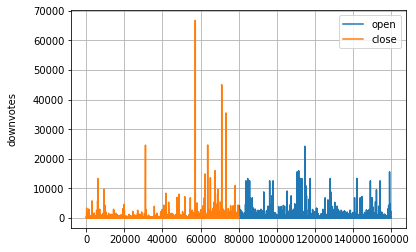

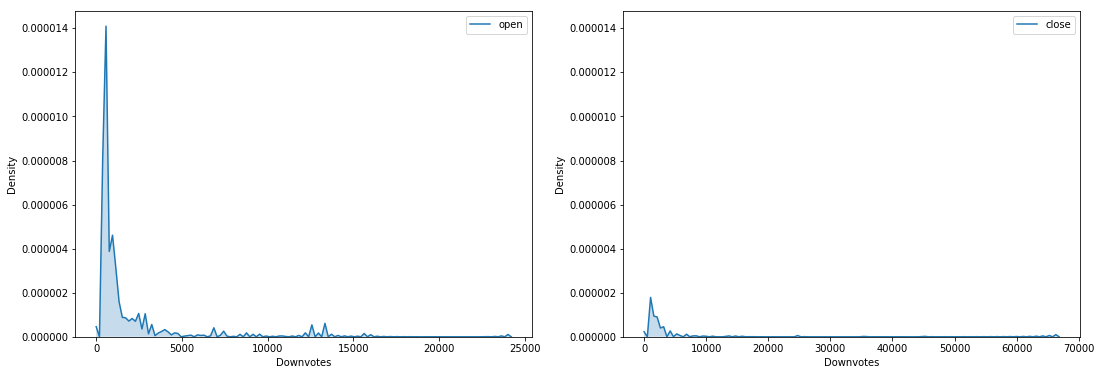

In [183]:
plt.figure()

plt.plot(openData['Downvotes'], label = 'open')
plt.plot(closeData['Downvotes'], label = 'close')
plt.ylabel('downvotes\n')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize = (18,6))
ax = plt.subplot(1,2,1)
ax2.use_sticky_edges = False
sb.kdeplot(openData['Downvotes'], label = 'open', shade = True)
plt.ylabel('Density')
plt.xlabel('Downvotes')

plt.subplot(1,2,2, sharey = ax)
sb.kdeplot(closeData['Downvotes'], label = 'close', shade = True)
plt.ylabel('Density')
plt.xlabel('Downvotes')

plt.show()

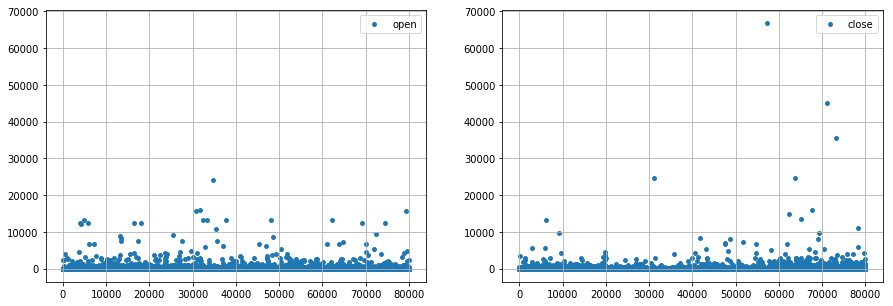

In [184]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.scatter(range(len(openData['Downvotes'])), openData['Downvotes'], label = 'open', s = 15)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2, sharey = ax1)
plt.scatter(range(len(closeData['Downvotes'])), closeData['Downvotes'], label = 'close', s = 15)
plt.legend()
plt.grid(True)

plt.show()

### 5. Views

In [185]:
max_views_o = np.max(openData['Views'])
min_views_o = np.min(openData['Views'])
avg_views_o = np.mean(openData['Views'])
max_views_c = np.max(closeData['Views'])
min_views_c = np.min(closeData['Views'])
avg_views_c = np.mean(closeData['Views'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_views_o) + '\t\t' + str(max_views_c))
print('Minimum\t\t' + str(min_views_o) + '\t\t' + str(min_views_c))
print('Average\t\t' + str(avg_views_o) + '\t' + str(avg_views_c))
print('Mode\t\t' + str(stat.mode(openData['Views'])) + '\t\t' + str(stat.mode(closeData['Views'])))
print('Median\t\t' + str(stat.median(openData['Views'])) + '\t\t' + str(stat.median(closeData['Views'])))

Value		Open		Close
Maximum		133100		157537
Minimum		0		0
Average		261.2462375	340.8749187459373
Mode		1		1
Median		40.0		30.0


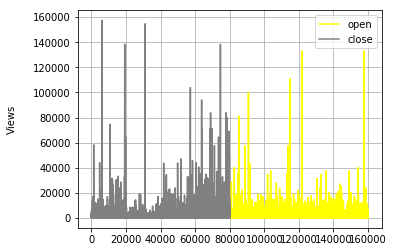

In [190]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(openData['Views'], label = 'open', color='yellow')
plt.plot(closeData['Views'], label = 'close', color='grey')
plt.ylabel('Views\n')
plt.legend()
plt.grid(True)

# plt.subplot(1,2,2)
# plt.hist([openData['Views'],closeData['Views']], label = ['open', 'close'])
# plt.legend()
# plt.grid(True)

plt.show()

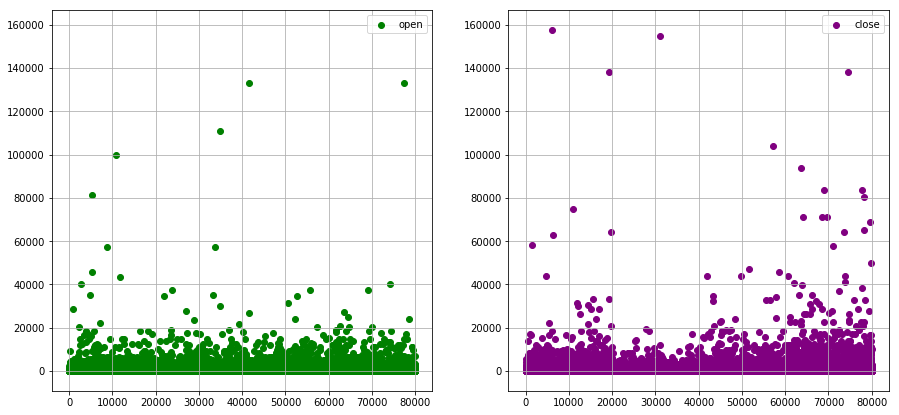

In [189]:
plt.figure(figsize=(15,7))

ax1 = plt.subplot(1,2,1)
plt.scatter(range(len(openData['Views'])), openData['Views'], label = 'open', color='green')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2, sharey = ax1)
plt.scatter(range(len(closeData['Views'])), closeData['Views'], label = 'close', color='purple')
plt.legend()
plt.grid(True)

plt.show()